In [1]:
import numpy as np
import scipy.io
from scipy.stats import f_oneway, shapiro
import matplotlib.pyplot as plt

In [3]:
# Load MATLAB data
data = scipy.io.loadmat('../Data_example3.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'alloy', 'strength'])

In [21]:
strength = data['strength']
alloy = data['alloy']

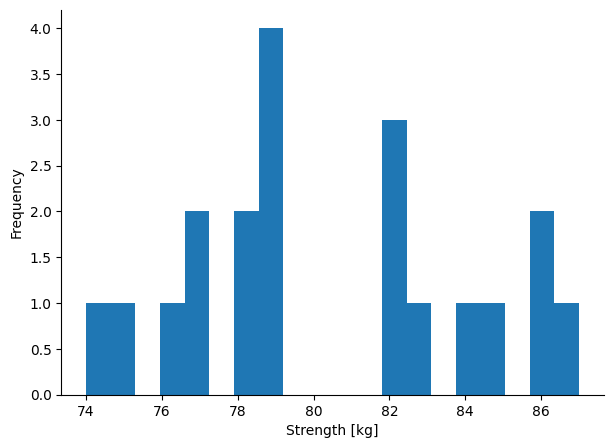

In [24]:
# Visualizzazione preliminare dei dati
fig, ax = plt.subplots(1, figsize = (7,5))
ax.hist(strength[0], bins = 20)
ax.set_xlabel("Strength [kg]")
ax.set_ylabel("Frequency")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

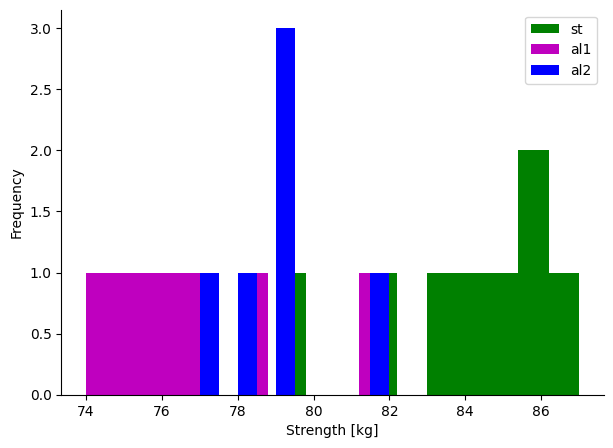

In [31]:
# Visualizzazione preliminare dei dati
fig, ax = plt.subplots(1, figsize = (7,5))
ax.set_xlabel("Strength [kg]")
ax.set_ylabel("Frequency")
ax.hist(strength[alloy == 'st'], color = 'g', label = 'st')
ax.hist(strength[alloy == 'al1'], color = 'm', label = 'al1')
ax.hist(strength[alloy == 'al2'], color = 'b', label = 'al2')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()

In [35]:
# Test di normalità
_, p = shapiro(data['strength'])
print(p)

0.3754662341272422


In [33]:
# Divido i tre gruppi

st = data['strength'][data['alloy'] == 'st']
al1 = data['strength'][data['alloy'] == 'al1']
al2 = data['strength'][data['alloy'] == 'al1']

mean_st = np.nanmean(st)
mean_al1 = np.nanmean(al1)
mean_al2 = np.nanmean(al2)
dev_st = np.nanstd(st)
dev_al1 = np.nanstd(al1)
dev_al2 = np.nanstd(al2)

In [34]:
_, p = shapiro(st)
print(p)
_, p = shapiro(al1)
print(p)
_, p = shapiro(al2)
print(p)

0.5319097622226013
0.5227052386224382
0.5227052386224382


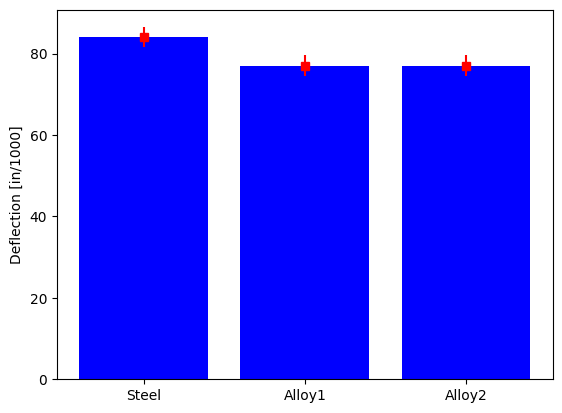

In [36]:
## Visualizzazione dei dati
plt.figure()
plt.bar([1, 2,3], [mean_st, mean_al1, mean_al2], color='blue')
plt.errorbar([1, 2,3], [mean_st, mean_al1, mean_al2], yerr=[dev_st,dev_al1, dev_al2], fmt='sr', markerfacecolor='red')
plt.xticks([1, 2,3], ['Steel','Alloy1','Alloy2'])
plt.ylabel('Deflection [in/1000]')
plt.show()

In [37]:
help(f_oneway)

Help on function f_oneway in module scipy.stats._stats_py:

f_oneway(*samples, axis=0, nan_policy='propagate', keepdims=False)
    Perform one-way ANOVA.

    The one-way ANOVA tests the null hypothesis that two or more groups have
    the same population mean.  The test is applied to samples from two or
    more groups, possibly with differing sizes.

    Parameters
    ----------
    sample1, sample2, ... : array_like
        The sample measurements for each group.  There must be at least
        two arguments.  If the arrays are multidimensional, then all the
        dimensions of the array must be the same except for `axis`.
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
    nan_policy : {'propagate', 'omit', 'rai

In [38]:
## Scegliere il test opportuno e formulare H0
_,p3= f_oneway(st,al1,al2)
p3

np.float64(0.00014126842501452228)

In [39]:
if p3 < 0.05: 
    print("Reject H0")
else: 
    print("Fail to reject H0")

Reject H0
